In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
from plotnine import *
from datetime import datetime, time
import numpy as np
from mizani.breaks import date_breaks
from mizani.formatters import date_format

In [2]:
df_berlin = pd.read_csv("../Data_API/dep_flights/depFlight_0320/berlin_0320.csv")

In [3]:
def check_unique_airports(df):
    df_airport_price = df[['depFlight_departure','depFlight_origin.name', 'price_amount']].copy()
    df_airport_price['depFlight_origin.name'] = df_airport_price['depFlight_origin.name'].str.replace(' ', '')
    return(df_airport_price['depFlight_origin.name'].unique())

In [4]:
def dep_airport_analysis(df):
    #Extract relevant columns: Departure Date/Time, Departure Airport, and Price
    df_airport_price = df[['depFlight_departure','depFlight_origin.name', 'price_amount']].copy()
    df_airport_price['depFlight_origin.name'] = df_airport_price['depFlight_origin.name'].str.replace(' ', '')

    #Keep only Departure Month from Departure Date/Time Column
    #Rename columns
    df_airport_price['departure month'] = pd.DatetimeIndex(df_airport_price['depFlight_departure']).month
    df_airport_price.drop(['depFlight_departure'], axis = 1, inplace = True)
    df_airport_price.rename(columns = {'depFlight_origin.name': 'airport', 'price_amount': 'price'}, inplace = True)

    #Group dataframe by Departure Airport
    #Create dictionary with: key = each unique airport, value = all flights departing from the airport
    df_grouped = df_airport_price.groupby('airport')
    dict_grouped = {name: group for name, group in df_grouped}

    #Assign each airport's dataframe to a new variable
    for name, df in dict_grouped.items():
        var_name = f"{name}_data"
        exec(f"{var_name} = df")

    #Find the median price to fly from each airport in each month
    median_prices = {}
    for airport in df_airport_price['airport'].unique():
        data = globals()[airport+'_data']
        median_prices[airport] = data.groupby('departure month')['price'].median().tolist()

    #Create new dataframe with 'Month' column
    df_monthly_airport_price = pd.DataFrame({'month': ['June', 'July', 'August', 'September'], **median_prices})

    print(df_monthly_airport_price)

    df_monthly_airport_price = df_monthly_airport_price.melt(id_vars='month', var_name='keys', value_name='values')

    month_order = ['June', 'July', 'August', 'September']
    df_monthly_airport_price['month'] = pd.Categorical(df_monthly_airport_price['month'], categories=month_order, ordered=True)

    #Plot line graph
    print(ggplot(data=df_monthly_airport_price, mapping=aes(x='month', y='values', group='keys', color='keys')) +\
        geom_line() +\
        geom_point() +\
        labs(x='Month', y='Departure Flight Price', title='Average Flight Price per Month for each Departure Airport'))

       month  LondonCity  LondonGatwick  LondonHeathrow  LondonStansted  \
0       June      115.52         79.780          159.73           64.90   
1       July      145.02        138.990          180.58           94.73   
2     August      111.52         80.905          175.58           66.90   
3  September       98.52         67.990          137.08           47.50   

   LondonLuton  
0       56.990  
1       90.490  
2       72.685  
3       65.990  


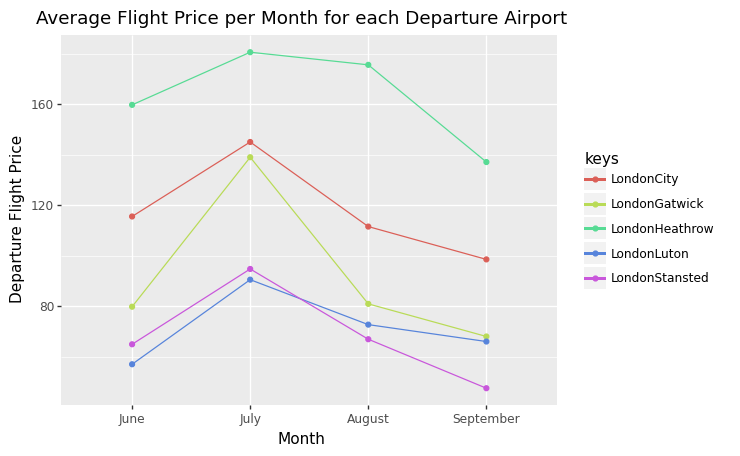

<ggplot: (8773229591013)>

In [9]:
dep_airport_analysis(df = df_berlin)

In [10]:
df_athens = pd.read_csv("../Data_API/dep_flights/depFlight_0320/athens_0320.csv")

       month  LondonHeathrow  LondonGatwick  LondonLuton  LondonStansted
0       June         309.400         164.99        135.7           193.9
1       July         331.680         249.49        227.3           233.0
2     August         252.600         164.99        171.9           156.9
3  September         186.635          80.99        139.1           128.9


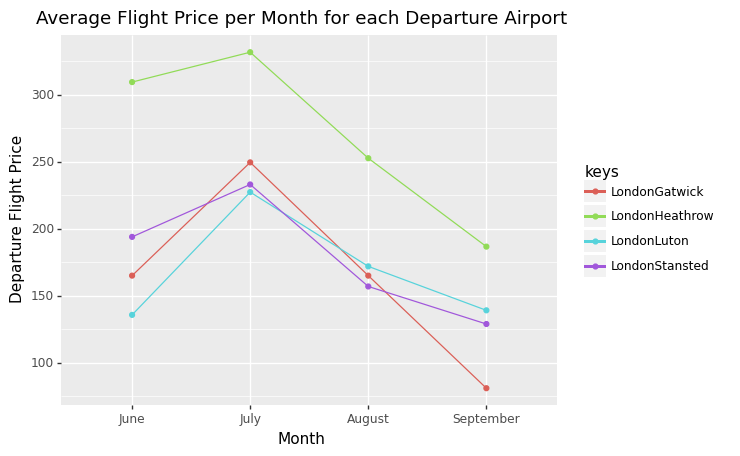

<ggplot: (8773193709984)>

In [13]:
dep_airport_analysis(df_athens)

In [15]:
df_budapest = pd.read_csv("../Data_API/dep_flights/depFlight_0320/budapest_0320.csv")

       month  LondonHeathrow  LondonStansted  LondonGatwick  LondonLuton
0       June          223.68         118.800        128.900       142.90
1       July          228.68         169.550        163.695       155.45
2     August          208.79         133.900        159.945       182.10
3  September          223.68          80.915        104.990       142.50


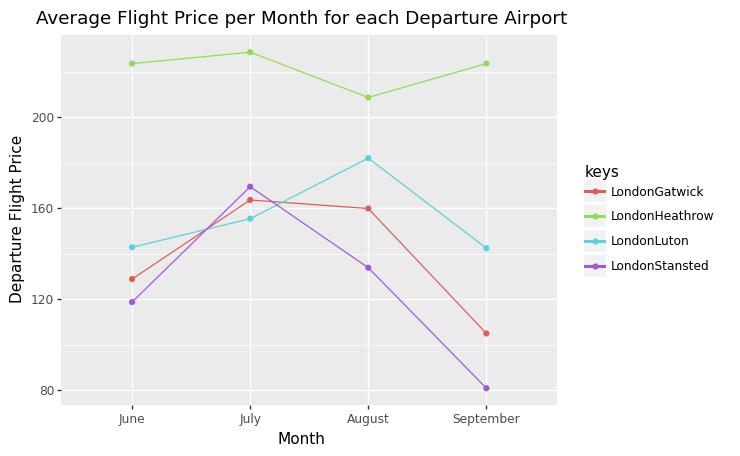

In [18]:
dep_airport_analysis(df = df_budapest)

In [19]:
df_paris = pd.read_csv("../Data_API/dep_flights/depFlight_0320/paris_0320.csv")

       month  LondonHeathrow  LondonGatwick  LondonLuton
0       June          172.15         67.485        61.99
1       July          172.00         72.090        69.69
2     August          141.84         65.290        59.99
3  September          218.88         67.180        56.99


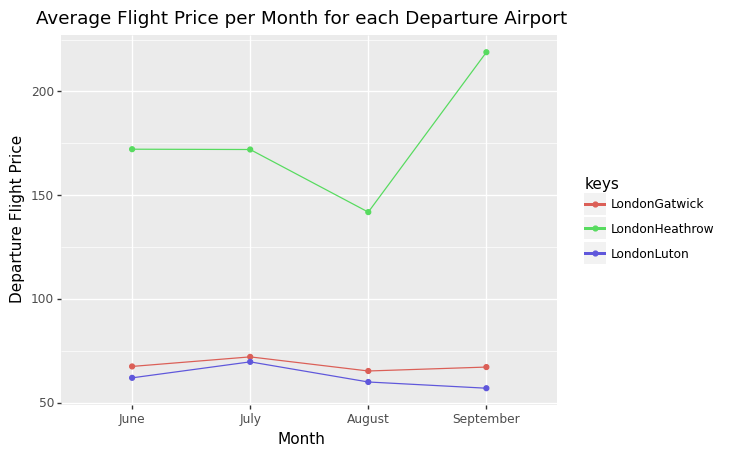

In [22]:
dep_airport_analysis(df_paris)

In [21]:
df_rome = pd.read_csv("../Data_API/dep_flights/depFlight_0320/rome_0320.csv")

       month  LondonGatwick  LondonHeathrow  LondonStansted
0       June        159.990          260.88          127.90
1       July        180.635          293.68          162.45
2     August        159.490          230.79          139.95
3  September        122.990          211.29          102.00


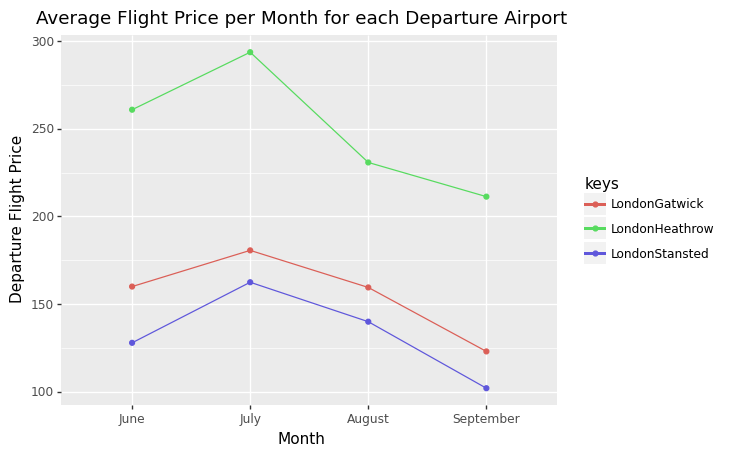

In [22]:
dep_airport_analysis(df_rome)